In [170]:
#Loading in the Dataset
import pandas as pd
df = pd.read_csv("C:/Users/Ken Mori/Documents/XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv")

In [171]:
#Looking at sample contents of the dataset
df.head()

,Year,Major,University,Time,Order
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...


In [172]:
#Looking at all the data types in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5000 non-null   object
 1   Major       5000 non-null   object
 2   University  5000 non-null   object
 3   Time        5000 non-null   int64 
 4   Order       5000 non-null   object
dtypes: int64(1), object(4)
memory usage: 195.4+ KB


Looking at the datset, there are 5000 rows of data with 5 columns: The year the student is in, the major they are pursuing, the university they are attending, the time they ordered the food,
and the order that they made.

In [173]:
#Finding the summary statistics of the dataset
df.describe()

,Time
count,5000.000000
mean,12.528200
std,1.357193
min,8.000000
25%,12.000000
50%,13.000000
75%,13.000000
max,17.000000


Looking at the summary statistics, the mean for the time that students order food from the truck is between 12 to 1 PM. The value of the mean makes sense due to the time period being Lunch.
The minimum time anybody orders food is 8 AM. The minimum time could be due to the food truck opening at 8 AM. The latest time anyone orders food is 5 PM. This could be the latest time that any student could order food from the truck before the food truck closes. 

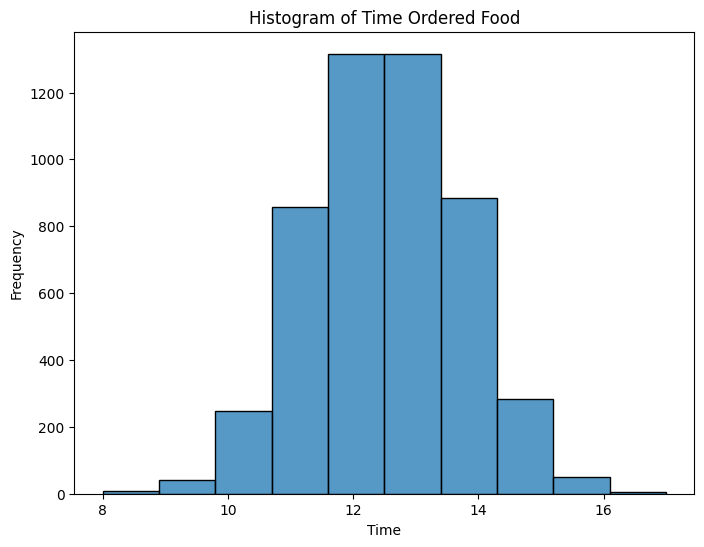

In [174]:
#Looking at visualizations of the dataset
import matplotlib.pyplot as plt
import seaborn as sns

#The easiest way to view the biases and distribtuion of a dataset is through a histogram, so I am implementing a histogram of the data.
plt.figure(figsize=(8, 6))
sns.histplot(df['Time'], bins=10)
plt.title('Histogram of Time Ordered Food')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

From the histogram below, we can see that the histogram is nearly symmetric and unimodal, meaning that the times has a normal distribution. The most common times to order food are around lunch time from 12 PM to 2 PM. Since the data is unimodal and symmetric, the mean of the times is around equal to the median of the times. There is no apparent skew or outliers from the histogram. 

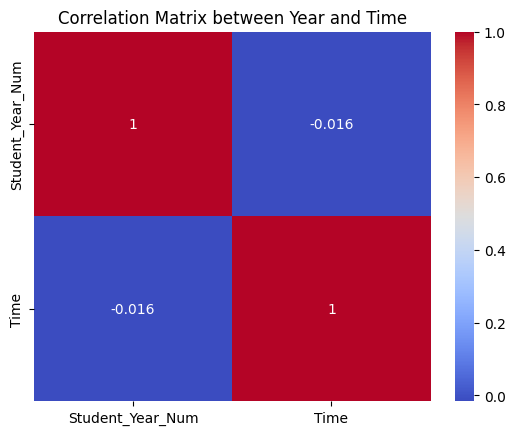

In [175]:
#Adding a correlation matrix to view any potential relationships between the columns of the data

#For this, I am going to be taking the year of each student(ie. year 2 = 2) and comparing it with the time they order food
df['Student_Year_Num'] = df['Year'].str.extract('(\d+)').astype(float)


year_time = df[['Student_Year_Num', 'Time']].corr()
sns.heatmap(year_time, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between Year and Time')
plt.show()

Seems like there is no correlation between student year and time they order food, which makes sense as there is no variable factor that affects when they get food. 

In [176]:
#I am going to try to see if there is a correlation between the year of student and what food they get. 
#I will also make another heatmap to see if there is a correlation between time and what food the students ordered.
#Seeing all the food options within the dataset
order_unique = df['Order'].unique()
print(order_unique)

#Making a new column that labels the orders by number
order_label = {value: label for label, value in enumerate(order_unique)}
df['Order_Label'] = df['Order'].map(order_label)

['Fried Catfish Basket' 'Sugar Cream Pie' 'Indiana Pork Chili'
 'Indiana Corn on the Cob (brushed with garlic butter)'
 'Indiana Buffalo Chicken Tacos (3 tacos)' 'Sweet Potato Fries'
 'Ultimate Grilled Cheese Sandwich (with bacon and tomato)'
 'Breaded Pork Tenderloin Sandwich' 'Cornbread Hush Puppies'
 'Hoosier BBQ Pulled Pork Sandwich']


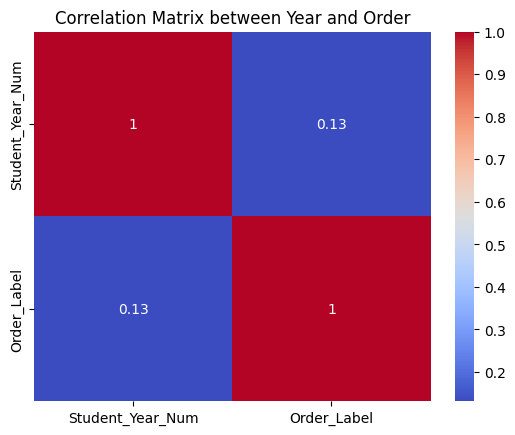

In [177]:
#Making first heatmap(year vs order)
year_order = df[['Student_Year_Num', 'Order_Label']].corr()
sns.heatmap(year_order, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between Year and Order')
plt.show()

While there is a larger value of correlation between order and the year of student, there still doesn't seem to be any correlation between the two. I will proceed to make a heatmap between order and time of order

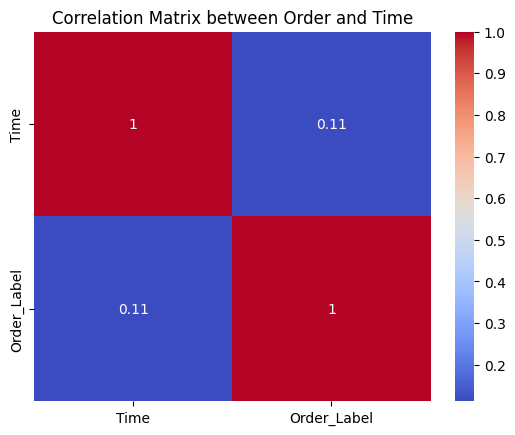

In [178]:
#Making second heatmap(time vs order)
time_order = df[['Time', 'Order_Label']].corr()
sns.heatmap(time_order, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between Order and Time')
plt.show()

Interestingly, there doesn't seem to be any correlation between the order and the time of order. The next steps will be to see if there is a correlation between the major of the student between the rest of the 2 variables. 

In [179]:
#Getting each of the majors from the dataset
major_unique = df['Major'].unique()
print(major_unique)

#Making a new column that labels the majors by number
major_label = {value: label for label, value in enumerate(major_unique)}
df['Major_Label'] = df['Major'].map(major_label)

['Physics' 'Chemistry' 'Biology' 'Business Administration' 'Anthropology'
 'Mathematics' 'Economics' 'Astronomy' 'Marketing' 'Political Science'
 'Finance' 'Sociology' 'Accounting' 'Psychology' 'International Business'
 'Music' 'Mechanical Engineering' 'Philosophy' 'Fine Arts'
 'Civil Engineering']


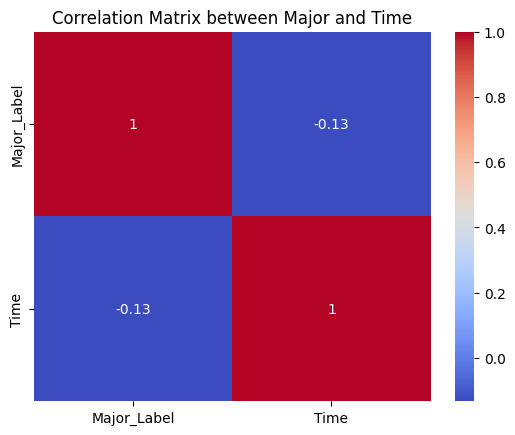

In [180]:
#First heatmap between time and major
time_major = df[['Major_Label', 'Time']].corr()
sns.heatmap(time_major, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between Major and Time')
plt.show()

Nothing of value to be gained. Second heatmap of Major and Order

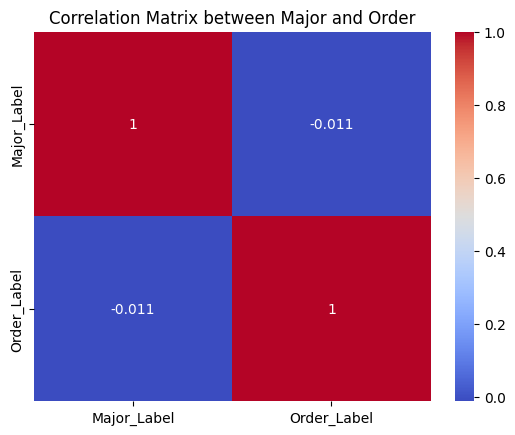

In [181]:
#Second heatmap between order and major
order_major = df[['Major_Label', 'Order_Label']].corr()
sns.heatmap(order_major, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between Major and Order')
plt.show()

Again, nothing of value to be gained. Let's try the last corrrelation between Major and Year

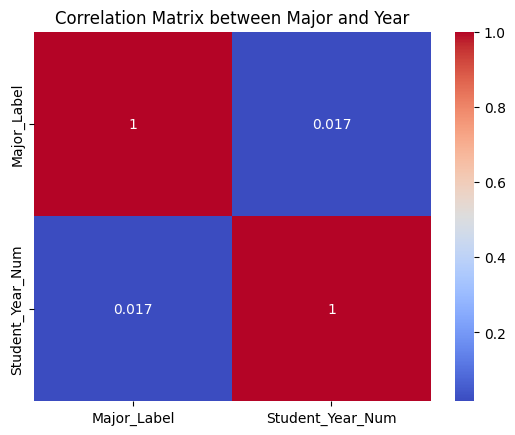

In [182]:
#Second heatmap between year and major
year_major = df[['Major_Label', 'Student_Year_Num']].corr()
sns.heatmap(year_major, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between Major and Year')
plt.show()

So far, it doesn't seem like there are any columns within the dataset that have a strong correlation with each other. The last try is to see if the university has a correlation any of these other columns

In [183]:
#Getting each of the universities from the dataset
university_unique = df['University'].unique()
print(university_unique)

#Making a new column that labels the universities by number
university_label = {value: label for label, value in enumerate(university_unique)}
df['University_Label'] = df['University'].map(university_label)

['Indiana State University' 'Ball State University' 'Butler University'
 'Indiana University-Purdue University Indianapolis (IUPUI)'
 'University of Notre Dame' 'University of Evansville'
 'Valparaiso University' 'Purdue University'
 'Indiana University Bloomington' 'DePauw University']


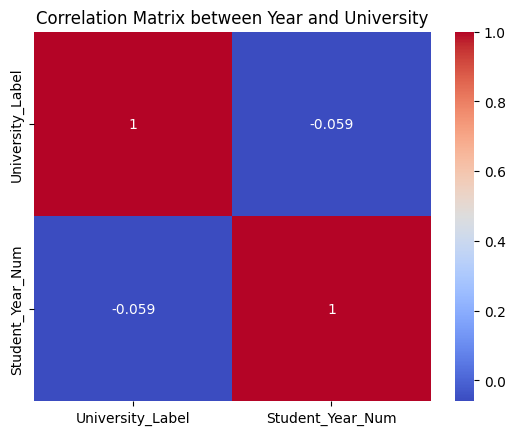

In [184]:
#Geting first heatmap between university and year
year_uni = df[['University_Label', 'Student_Year_Num']].corr()
sns.heatmap(year_uni, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between Year and University')
plt.show()

Nothing of value to be gained. At this point, I am only going to compare the university to order and time. 

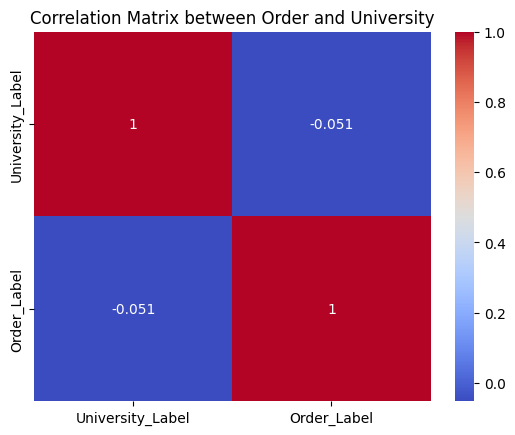

In [185]:
#Geting heatmap between university and order
order_uni = df[['University_Label', 'Order_Label']].corr()
sns.heatmap(order_uni, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between Order and University')
plt.show()

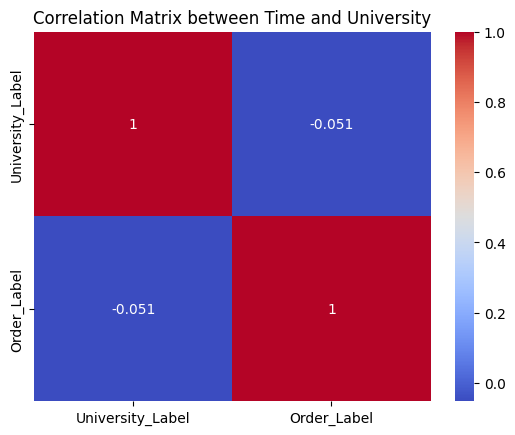

In [186]:
#Geting heatmap between university and time 
time_uni = df[['University_Label', 'Time']].corr()
sns.heatmap(order_uni, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between Time and University')
plt.show()

Since none of the coorelation values between columns are high or noticeable, I am going to take the highest correlation and make a histogram for it.

I am going to create histograms of actual food orders and the year the students are in that ordered. 

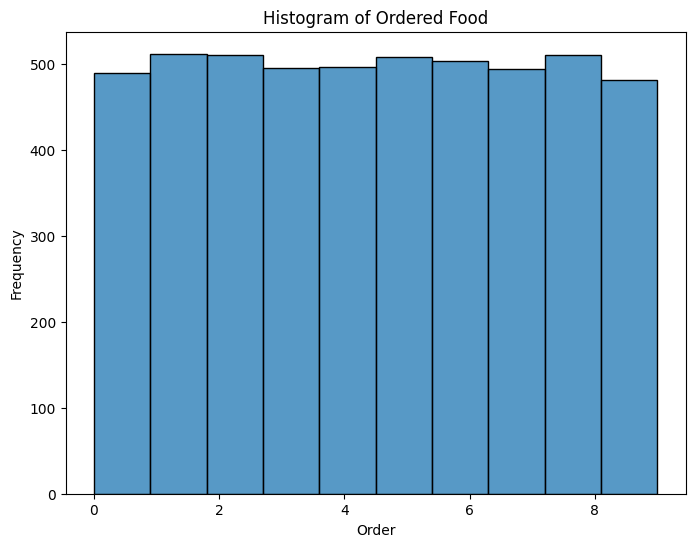

In [187]:
#Histogram of Order
plt.figure(figsize=(8, 6))
sns.histplot(df['Order_Label'], bins=10)
plt.title('Histogram of Ordered Food')
plt.xlabel('Order')
plt.ylabel('Frequency')
plt.show()

There doesn't seem to be any patterns of what people buy. Everyone likes the food in the food truck equally. I am going to try year next. 

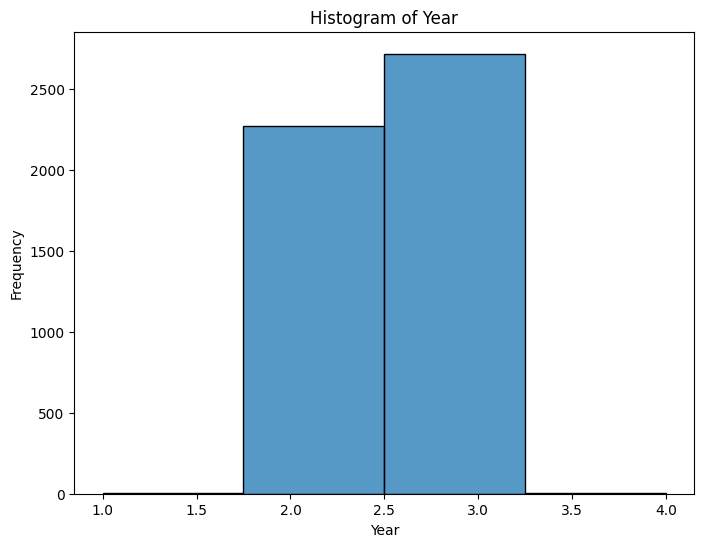

In [188]:
#Histogram of Year
plt.figure(figsize=(8, 6))
sns.histplot(df['Student_Year_Num'], bins=4)
plt.title('Histogram of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

There is something remarkable about this histogram. It seems as if seniors and freshman at high school rarely order, if at all, from the Xtern food truck. It is mainly sophomores and juniors that order from the Xtern food truck. That will be something to note. 

Finally, let's check the histogram of the location 

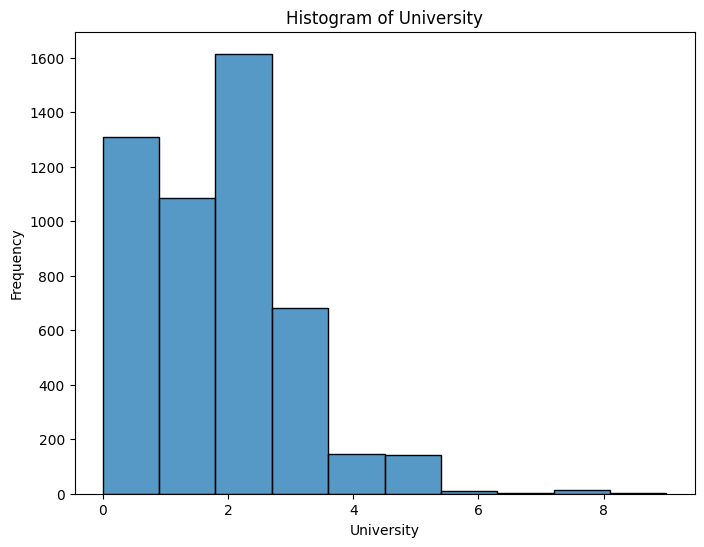

In [189]:
#Histogram of University
plt.figure(figsize=(8, 6))
sns.histplot(df['University_Label'], bins=10)
plt.title('Histogram of University')
plt.xlabel('University')
plt.ylabel('Frequency')
plt.show()

This is another interesting graph that could potentially show biases and patterns in the data. Let's take a look at the labels of each university.

In [190]:
print(university_label)

{'Indiana State University': 0, 'Ball State University': 1, 'Butler University': 2, 'Indiana University-Purdue University Indianapolis (IUPUI)': 3, 'University of Notre Dame': 4, 'University of Evansville': 5, 'Valparaiso University': 6, 'Purdue University': 7, 'Indiana University Bloomington': 8, 'DePauw University': 9}


This is interesting to note. It seems as if universities near cities have more frequent students that order food from the food trucks. For example, Indiana State University is in a city, while DePau University is in a small town in Greencastle. There is a heavy right skew, with Purdue University and DePau University being potential outliers. 

 Based off the data visualizations and patterns below, there are a few recommendations I would make for the FoodX trucks. 

 1. I would priortize selling or having more locations within universities that are housed in more populated cities. These, from the histogram, tend to attract more students to order food. 

 2. I would prioritize selling food to students that are older. If there was a method FoodX can utilize to determine the eating time patterns of sophmores and juniors, I would try to sell the food at the time where most juniors and sophmores eat. I would advise the company to avoid targeting freshman or seniors as their target audience as they have other options to eat. 

 Potential marketing strageities could include selling food within the campus to attract more students to food trucks and giving frequent visitors coupons and referral bonuses to attract more students to the food trucks. 

Question: Consider implications of data collection, storage, and data biases you would consider relevant here considering Data Ethics, Business Outcomes, and Technical Implications

1. Discuss Ethical implications of these factors

I believe that main ethical implication of data collection is privacy. 
When comapnies gather and store personal infromation that the user or the customer has not agreed to share, it could violate the privacy of the user and lead to a morality issue of whether it is ethical to utilize someone's personal information for their own benefit. Another ethical implication of data storage is marketing. If a company markets off the data sold to another company or client, there could be an ethical issue of selling other people data without consent. 

2. Discuss Business outcome implications of these factors

I believe that the business outcome implications of tracking data is to be compliant with the privacy laws. If a business or company fails to comply with privacy laws such as CCPA or GDPR, then they could risk paying significant fines and lawsuits. Another business implication of getting data is utilizing and handling the data in a safe and benficial way for the customer. This helps build trust between the business and customer and improves the credibility of the business. 

3. Discuss Technical implications of these factors

A technical implication of gathering data would be the data quality. It is important that the data is not biased or corrupted in any way, and is fair and useful data that a business can utilize. Another technical implication of data management is the scalability of the data storage. If more data is stored, then it could impact the costs to maintain the storage. It is important for businesses to know the limit of data that they can manage and store. Finally, data security is a very important technical implication to data handling, as it helps protect the data from breaches that could not only cost businesses millions or billions of dollars, but also break the trust between the consumer and the business. 

Outline of creating a model to predict customer orders:

1. Data preparation: It is important to prepare and modify the data in order to utilize it in training a model

2. Model selection: There are many different types of models: Neural Networks, Decision Trees, SVM, etc. I will chose a model that is simple yet effective. 

3. Training function: I will create a training function that trains the dataset and train the model 


In [191]:
#First, I will create a function that will train the model:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import joblib 
def prepare_data(path):
    df =  pd.read_csv(path)
    df['Student_Year_Num'] = df['Year'].str.extract('(\d+)').astype(float)
    university_label = {value: label for label, value in enumerate(university_unique)}
    df['University_Label'] = df['University'].map(university_label)
    major_unique = df['Major'].unique()
    major_label = {value: label for label, value in enumerate(major_unique)}
    df['Major_Label'] = df['Major'].map(major_label)

    X = df.drop(columns=['Order','Year', 'University', 'Major'])
    y = df['Order']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

In [192]:
#Next I will chose a model. I have decided to chose Decision Trees as order is a categorical value.
#Therefore, I can treat this dataset as a multiclass classifcation. 

def train_model(X_train, y_train, model_file):
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    joblib.dump(model, model_file)

In [193]:
#I will evaluate the model using a function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    return accuracy, classification_rep

In [194]:
#Finally, I will load the data and train the model using the functions
X_train, X_test, y_train, y_test = prepare_data("C:/Users/Ken Mori/Documents/XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv")
train_model(X_train, y_train, 'XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.pkl')
model = joblib.load('XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.pkl')
accuracy, classification_report = evaluate_model(model, X_test, y_test)
print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_report)

Accuracy: 0.642
Classification Report:
                                                           precision    recall  f1-score   support

                        Breaded Pork Tenderloin Sandwich       0.60      0.48      0.53        94
                                  Cornbread Hush Puppies       0.54      0.61      0.57       112
                                    Fried Catfish Basket       0.66      0.57      0.61       107
                        Hoosier BBQ Pulled Pork Sandwich       0.64      0.65      0.64       103
                 Indiana Buffalo Chicken Tacos (3 tacos)       0.63      0.58      0.60        93
    Indiana Corn on the Cob (brushed with garlic butter)       0.70      0.85      0.76        84
                                      Indiana Pork Chili       0.74      0.85      0.79        95
                                         Sugar Cream Pie       0.62      0.57      0.59       110
                                      Sweet Potato Fries       0.60      0.56

In [195]:
#Visual Model of the Decision Tree
#I will show Confusion Matrix 

#Confusion Matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[45  6  6  3  2 10  7  4  1 10]
 [ 6 68  7  2  8  5  2 11  0  3]
 [ 8 12 61  1  2  1  4  0 16  2]
 [ 0  0  0 67 11  0  1  7 16  1]
 [ 0 11  2  9 54  4  1  3  1  8]
 [ 4  2  1  0  0 71  5  0  0  1]
 [ 3  4  1  0  1  2 81  1  0  2]
 [ 3 10  2 17  2  4  6 63  0  3]
 [ 2  9  9  4  3  0  2 11 55  3]
 [ 4  5  3  2  3  5  0  2  3 77]]


Given the work required to bring a solution like this to maturity and its performance, what considerations would you make to determine if this is a suitable course of action?


I would say that some considerations before I determine if having an AI model that could predict food choices for students is the data collection. Would it be viable to spend the resources retrieivng constant data from users to regularly train and update the model? I would determine if the data is clean and has no biases. I would also consider the AI model itself, such as how to determine the model's performance and how to regularly train it everyday to new data. Finally, I would consider if an AI model assistant is something the user would want. If most users don't want an AI model, why develop an AI model if no one is going to utilize it? These are some of the considerations I would examine before determining if launching a FoodX food recommender AI would be a suitable course of action. 